<a href="https://colab.research.google.com/github/DiegoFortezaBenito/deeplearning/blob/main/Copia_de_2_1_Un_primer_vistazo_a_una_Red_Neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio con regularizadores

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)
from keras.datasets import mnist
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.9.2


In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
# Prepara con reshape y normaliza las imágenes tanto de entrenamiento como de test
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [ ]:
# Crear un subconjunto de imágenes de entrenamiento que llamaré
# validation_images, para hacer las validaciones, con las 10000 últimas imágenes 
validation_images=train_images[50000:]  
train_images=train_images[:49999]      

validation_labels=train_labels[50000:]
train_labels=train_labels[:49999]

print(validation_images.shape)
print(validation_labels.shape)
# del set de datos de entrenamiento (train_images) (obviamente, lo mismo con las
# etiquetas correspondientes -> validation_labels). Deja preparadas las 50K 
# primeras imágenes y etiquetas para entrenamiento (train_images y train_labels)

(10000, 784)
(10000,)


In [ ]:
def crea_modelo(regularizador):
  # Define una función que recibe un número del 0 al 4 que creará:
  # un modelo secuencial con una capa de entrada densa de 512 neuronas
  # con activación relu y la capa de salida que le corresponda según el problema
  # Ahora, en función del número del regularizador:
  # Si es 0, no mete ningún regularizador
  # Si es 1, mete un regularizador de tipo l1 y valor 0.001
  # Si es 2, mete un regularizador de tipo l2 y valor 0.001
  # Si es 3, mete un regularizador de tipo l1_l2 y valor 0.001 para ambos
  # Si es 4, mete un Dropout del 50% después de la primera capa densa
  # Si es distinto que estos valores, escribe el error y retorna
  # Al final, esta función pinta el summary del modelo y retorna el modelo creado
  model = models.Sequential()
  if regularizador==0:
      model.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
  elif regularizador==1:
      model.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.001),activation='relu',input_shape=(28*28,)))
  elif regularizador==2:
      model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001),activation='relu',input_shape=(28*28,)))
  elif regularizador==3:
      model.add(layers.Dense(512, kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001),activation='relu',input_shape=(28*28,)))
  elif regularizador==4:
      model.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
      model.add(layers.Dropout(0.5))
  else:
      print("ERROR. El valor debe estar entre 0 y 4.")
  model.add(layers.Dense(10,activation='softmax'))
  model.summary()
  return model

In [ ]:
def compila_modelo(modelo): 
  # Define una función que recibe un modelo, lo compila con un optimizador
  # 'rmsprop', con una función de pérdida 'sparse_categorical_crossentropy' y
  # una métrica de precisión. La función retorna el modelo
  modelo.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  return modelo

In [ ]:
def entrena_modelo(modelo):
  history = modelo.fit(train_images,
                    train_labels,
                    epochs=30,
                    batch_size=128,
                    validation_data=(validation_images, validation_labels))
  return history
  # Define una función que entrena el modelo que se le pasa por parámetro,
  # con las imágenes y etiquetas de entrenamiento, con 30 iteraciones y 128
  # de tamaño de minilote y con el validation_data creado más arriba.
  # Esta función devuelve un history

In [ ]:
def pinta_perdida_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  epochs = range(1, len(acc) + 1)
  # "bo" es para "punto azun"
  plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
  # "b" es para "linea continua azul"
  plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
  plt.title('Pérdida de Entrenamiento y Validación')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [ ]:
def pinta_precision_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  plt.clf()   # Limpia la figura
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
  plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
  plt.title('Precisión de Entrenamiento y Valización')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

## Una vez definidas todas las funciones anteriores, ejecuta las siguientes llamadas a dichas funciones y deduce que está pasando y, para este contexto, que es lo que mejor está funcionando

### Caso 0, sin regularizadores

In [ ]:
network0 = crea_modelo(0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network0 = compila_modelo(network0)

In [ ]:
historia0 = entrena_modelo(network0)

Epoch 1/30
391/391 [==============================] - 8s 8ms/step - loss: 0.2784 - accuracy: 0.9199 - val_loss: 0.1518 - val_accuracy: 0.9566
Epoch 2/30
391/391 [==============================] - 2s 6ms/step - loss: 0.1158 - accuracy: 0.9647 - val_loss: 0.1053 - val_accuracy: 0.9693
Epoch 3/30
391/391 [==============================] - 2s 6ms/step - loss: 0.0754 - accuracy: 0.9777 - val_loss: 0.0869 - val_accuracy: 0.9746
Epoch 4/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0545 - accuracy: 0.9843 - val_loss: 0.0866 - val_accuracy: 0.9748
Epoch 5/30
391/391 [==============================] - 1s 3ms/step - loss: 0.0398 - accuracy: 0.9876 - val_loss: 0.0784 - val_accuracy: 0.9783
Epoch 6/30
391/391 [==============================] - 2s 4ms/step - loss: 0.0308 - accuracy: 0.9910 - val_loss: 0.0833 - val_accuracy: 0.9767
Epoch 7/30
391/391 [==============================] - 2s 4ms/step - loss: 0.0233 - accuracy: 0.9932 - val_loss: 0.0835 - val_accuracy: 0.9785
Epoch 

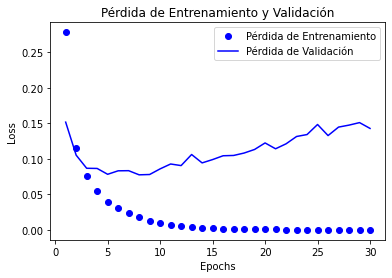

In [ ]:
pinta_perdida_entrenamiento_validacion(historia0)

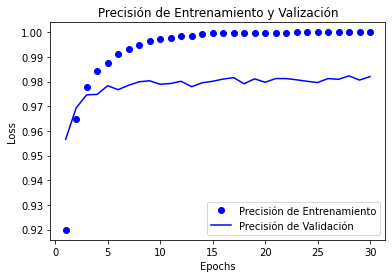

In [ ]:
pinta_precision_entrenamiento_validacion(historia0)

### Caso 1: Con regularizador l1

In [ ]:
network1 = crea_modelo(1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network1 = compila_modelo(network1)

In [ ]:
historia1 = entrena_modelo(network1)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 2.1591 - accuracy: 0.8447 - val_loss: 1.0762 - val_accuracy: 0.8456
Epoch 2/30
391/391 [==============================] - 2s 5ms/step - loss: 0.9572 - accuracy: 0.8821 - val_loss: 0.8206 - val_accuracy: 0.9178
Epoch 3/30
391/391 [==============================] - 2s 4ms/step - loss: 0.8351 - accuracy: 0.9024 - val_loss: 0.7404 - val_accuracy: 0.9279
Epoch 4/30
391/391 [==============================] - 1s 4ms/step - loss: 0.7595 - accuracy: 0.9151 - val_loss: 0.7005 - val_accuracy: 0.9323
Epoch 5/30
391/391 [==============================] - 1s 3ms/step - loss: 0.7094 - accuracy: 0.9237 - val_loss: 0.6735 - val_accuracy: 0.9395
Epoch 6/30
391/391 [==============================] - 1s 3ms/step - loss: 0.6722 - accuracy: 0.9300 - val_loss: 0.6630 - val_accuracy: 0.9261
Epoch 7/30
391/391 [==============================] - 2s 4ms/step - loss: 0.6447 - accuracy: 0.9347 - val_loss: 0.6085 - val_accuracy: 0.9447
Epoch 

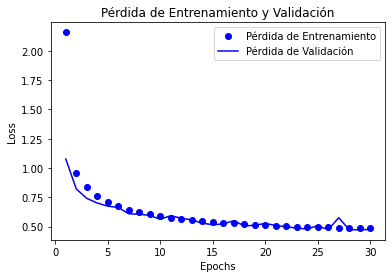

In [ ]:
pinta_perdida_entrenamiento_validacion(historia1)

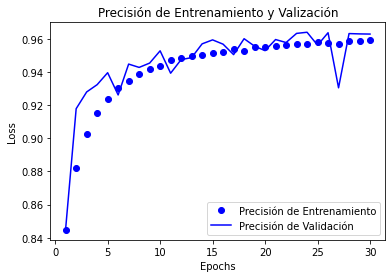

In [ ]:
pinta_precision_entrenamiento_validacion(historia1)

### Caso 2: Con regularizador l2

In [1]:
network2 = crea_modelo(2)

NameError: ignored

In [ ]:
network2 = compila_modelo(network2)

In [ ]:
historia2 = entrena_modelo(network2)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 0.5227 - accuracy: 0.9134 - val_loss: 0.2981 - val_accuracy: 0.9540
Epoch 2/30
391/391 [==============================] - 1s 4ms/step - loss: 0.2648 - accuracy: 0.9539 - val_loss: 0.2360 - val_accuracy: 0.9604
Epoch 3/30
391/391 [==============================] - 2s 4ms/step - loss: 0.2100 - accuracy: 0.9627 - val_loss: 0.2013 - val_accuracy: 0.9647
Epoch 4/30
391/391 [==============================] - 2s 5ms/step - loss: 0.1874 - accuracy: 0.9669 - val_loss: 0.1755 - val_accuracy: 0.9709
Epoch 5/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1729 - accuracy: 0.9696 - val_loss: 0.1824 - val_accuracy: 0.9658
Epoch 6/30
391/391 [==============================] - 2s 4ms/step - loss: 0.1643 - accuracy: 0.9721 - val_loss: 0.2024 - val_accuracy: 0.9587
Epoch 7/30
391/391 [==============================] - 2s 4ms/step - loss: 0.1565 - accuracy: 0.9728 - val_loss: 0.1835 - val_accuracy: 0.9663
Epoch 

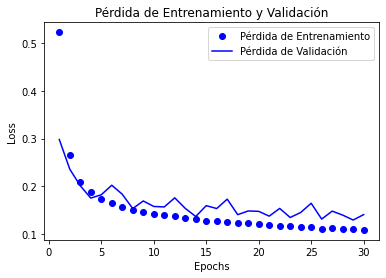

In [ ]:
pinta_perdida_entrenamiento_validacion(historia2)

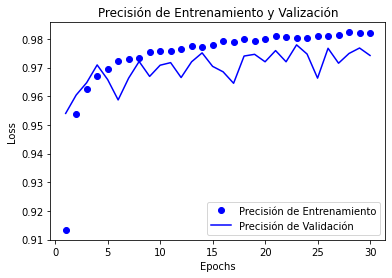

In [ ]:
pinta_precision_entrenamiento_validacion(historia2)

### Caso 3: Con regularizador l1_l2

In [ ]:
network3 = crea_modelo(3)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network3 = compila_modelo(network3)

In [ ]:
historia3 = entrena_modelo(network3)

Epoch 1/30
391/391 [==============================] - 2s 5ms/step - loss: 2.1561 - accuracy: 0.8427 - val_loss: 1.0180 - val_accuracy: 0.8892
Epoch 2/30
391/391 [==============================] - 2s 4ms/step - loss: 0.9793 - accuracy: 0.8771 - val_loss: 1.0059 - val_accuracy: 0.8487
Epoch 3/30
391/391 [==============================] - 1s 4ms/step - loss: 0.8574 - accuracy: 0.8994 - val_loss: 0.8053 - val_accuracy: 0.8989
Epoch 4/30
391/391 [==============================] - 1s 4ms/step - loss: 0.7823 - accuracy: 0.9128 - val_loss: 0.7496 - val_accuracy: 0.9247
Epoch 5/30
391/391 [==============================] - 2s 4ms/step - loss: 0.7313 - accuracy: 0.9202 - val_loss: 0.7230 - val_accuracy: 0.9228
Epoch 6/30
391/391 [==============================] - 1s 4ms/step - loss: 0.6938 - accuracy: 0.9272 - val_loss: 0.6765 - val_accuracy: 0.9278
Epoch 7/30
391/391 [==============================] - 2s 4ms/step - loss: 0.6638 - accuracy: 0.9327 - val_loss: 0.6263 - val_accuracy: 0.9443
Epoch 

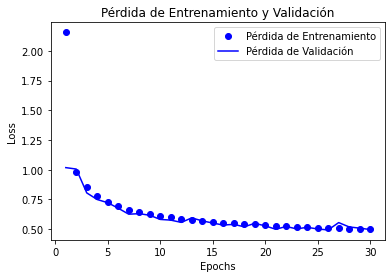

In [ ]:
pinta_perdida_entrenamiento_validacion(historia3)

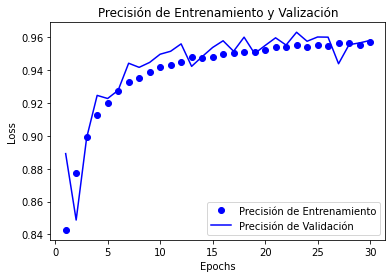

In [ ]:
pinta_precision_entrenamiento_validacion(historia3)

### Caso 4: Con Droput

In [ ]:
network4 = crea_modelo(4)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network4 = compila_modelo(network4)

In [ ]:
historia4 = entrena_modelo(network4)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 0.3408 - accuracy: 0.8992 - val_loss: 0.1562 - val_accuracy: 0.9562
Epoch 2/30
391/391 [==============================] - 2s 4ms/step - loss: 0.1656 - accuracy: 0.9505 - val_loss: 0.1169 - val_accuracy: 0.9664
Epoch 3/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1255 - accuracy: 0.9623 - val_loss: 0.0943 - val_accuracy: 0.9725
Epoch 4/30
391/391 [==============================] - 2s 4ms/step - loss: 0.1044 - accuracy: 0.9696 - val_loss: 0.0885 - val_accuracy: 0.9735
Epoch 5/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0905 - accuracy: 0.9736 - val_loss: 0.0833 - val_accuracy: 0.9766
Epoch 6/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0821 - accuracy: 0.9763 - val_loss: 0.0837 - val_accuracy: 0.9763
Epoch 7/30
391/391 [==============================] - 2s 5ms/step - loss: 0.0769 - accuracy: 0.9778 - val_loss: 0.0793 - val_accuracy: 0.9759
Epoch 

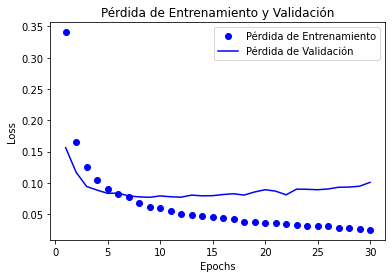

In [ ]:
pinta_perdida_entrenamiento_validacion(historia4)

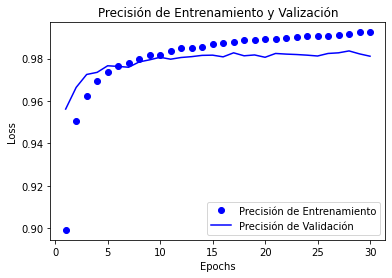

In [ ]:
pinta_precision_entrenamiento_validacion(historia4)

### Caso 5: Error de código de regularizador

In [ ]:
network5 = crea_modelo(5)

ERROR. El valor debe estar entre 0 y 4.


ValueError: ignored

### CONCLUSIONES

Con los resultados obtenidos se concluye que:

Con `l1` se aprecia que aunque las funciones de pérdida con los datos de entrenamiento y validación son muy similares la pérdida ofrecida por ambas sigue siendo bastante elevada, alrededor de 0.5, con respecto a los demas regularizadores.

Las funciones de precisión con ambos conjuntos vuelven a ser bastante similares lo que nos hace indicar que este modelo está siendo capaz de generalizar bastante bien los datos de validación.

Con `l2` se observa que las funciones de pérdida con los datos de entrenamiento y validación no son tan similares como con `l1` aunque los resultados obtenidos son mucho mejores que los obtenidos con `l1`. Sin embargo, otro factor a tener en cuenta sería la ligera divergencia que se observa entre ambas funciones, es decir, este modelo no está siendo capaz de generalizar tan bien como con `l1` .

En las funciones de precisión se vuelve a observar unos mejores resultados que con `l1` y la divergencia entre ambas.

Con `l1_l2` ocurre prácticamente lo mismo que con `l1`, es decir, las funciones de pérdida con los datos de entrenamiento y validación son muy similares pero la pérdida ofrecida por ambas es muy elevada.

Las funciones de precisión vuelven a ser muy parecidas que las de `l1` obteniendo así una precisión alrededor del 95%.

Con `dropout` con valor 0.05 se obtienen con los datos de entrenamiento las mejores pérdidas obtenidas en los 4 modelos. Sin embargo, con los datos de validación el modelo no es capaz de generalizar y produce sobreentrenamiento a partir de la epooch 5. A pesar del sobreentrenamiento, las pérdidas con los datos de validación sigue siendo muy bajas alrededor de 0.1.

Todo esto comentado se vuelve a apreciar en la precisión con ambos conjuntos. Los resultados obtenidos con los datos de entrenamiento rondan 
el 100% en torno a la epoch 7 lo que produce el fenómeno de sobreentrenamiento y que la precisión con los datos de validación no supere el 95%.

Por tanto se concluye que el uso de `dropout` con valor 0.05 proporciona el mejor rendimiento en este modelo a pesar del sobreentrenamiento generado. Si no se quisiese el uso de este modelo por lo ya comentado se plantearía el uso del regularizador `l2` aunque los resultados obtenidos con este no son tan precisos como con `dropout`. 
